In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("births_by_age.csv")

In [3]:
df['Lower Age'] = df['AGE'].apply(lambda x: int(x.split('-')[0]))
df['Upper Age'] = df['AGE'].apply(lambda x: int(x.split('-')[1]))
df['Average Age'] = (df['Lower Age'] + df['Upper Age']) / 2

In [4]:
total_births = df['Count'].sum()
df['Success Rate'] = df['Count'] / total_births
max_success_rate = df['Success Rate'].max()
df['Scaled Success Rate'] = df['Success Rate'] / max_success_rate

In [5]:
user_age = float(input("Enter age (15-44): "))

Enter age (15-44): 15


In [6]:
scaled_success_rate = df.loc[(df['Lower Age'] <= user_age) & (df['Upper Age'] >= user_age), 'Scaled Success Rate']
if not scaled_success_rate.empty:
    scaled_success_rate = scaled_success_rate.values[0]
    print(f"Scaled Success Rate for age {user_age}: {scaled_success_rate:.2%}")
else:
    print("Invalid age input.")

Scaled Success Rate for age 15.0: 33.67%


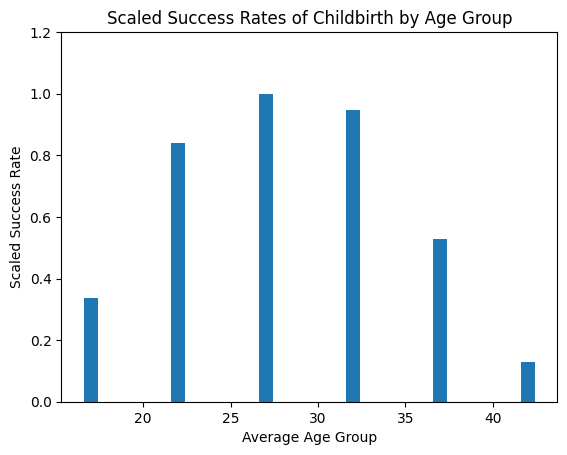

In [7]:
plt.bar(df['Average Age'], df['Scaled Success Rate'])
plt.xlabel('Average Age Group')
plt.ylabel('Scaled Success Rate')
plt.title('Scaled Success Rates of Childbirth by Age Group')
plt.ylim(0, 1.2)
plt.show()

In [8]:
bmi_categories = {
    (0, 18.5): "Underweight",
    (18.5, 24.9): "Normal Weight",
    (25.0, 29.9): "Overweight",
    (30.0, 40): "Obese"
}

In [9]:
data = pd.read_csv("height_weigt.csv")
def categorize_bmi(weight, height):
    bmi = (weight / (height / 100) ** 2)
    for bmi_range, label in bmi_categories.items():
        if bmi_range[0] <= bmi < bmi_range[1]:
            return label
    return "Unknown"
data['bmi_category'] = data.apply(lambda row: categorize_bmi(row['weight'], row['height']), axis=1)
X = data[['bmi_category']]
y = data['risk']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train_encoded = pd.get_dummies(X_train, columns=['bmi_category'])
X_test_encoded = pd.get_dummies(X_test, columns=['bmi_category'])

In [12]:
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

LogisticRegression()

In [13]:
user_weight = float(input("Enter your weight: "))
user_height = float(input("Enter your height: "))

user_bmi_category = categorize_bmi(user_weight, user_height)
print("User BMI Category:", user_bmi_category)

user_data = pd.DataFrame({'bmi_category': [user_bmi_category]})

user_data_encoded = pd.get_dummies(user_data, columns=['bmi_category'])

missing_cols = set(X_train_encoded.columns) - set(user_data_encoded.columns)
for col in missing_cols:
    user_data_encoded[col] = 0

user_data_encoded = user_data_encoded[X_train_encoded.columns]

print("User Encoded Data:")
print(user_data_encoded)

predicted_risk = model.predict(user_data_encoded)

if predicted_risk == 0:
    print("Low risk")
else:
    print("High risk")

Enter your weight: 80
Enter your height: 150
User BMI Category: Obese
User Encoded Data:
   bmi_category_Normal Weight  bmi_category_Obese  bmi_category_Overweight  \
0                           0                True                        0   

   bmi_category_Underweight  
0                         0  
Low risk


<Axes: xlabel='weight', ylabel='height'>

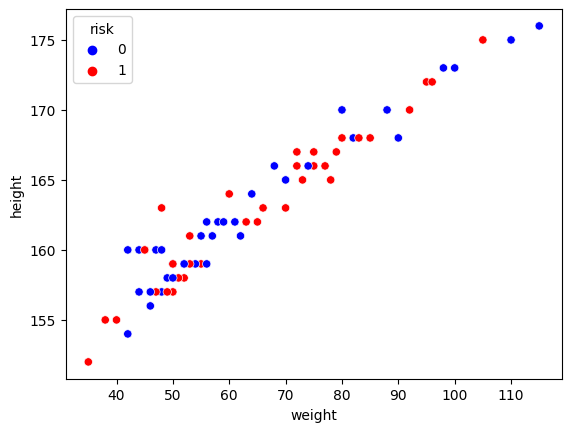

In [14]:
sns.scatterplot(x='weight', y='height', hue='risk', data=data, palette={0: 'blue', 1: 'red'})

In [15]:
def predict_final_risk(scaled_success_rate, high_low_risk):
    if high_low_risk == 1:  # High risk
        if scaled_success_rate >= 0.75:
            return "Moderate Risk"
        else:
            return "High Risk"
    else:  # Low risk
        if scaled_success_rate >= 0.5:
            return "Low Risk"
        elif scaled_success_rate <= 0.1:
            return "High Risk"
        else:
            return "Moderate Risk"

final_risk_prediction = predict_final_risk(scaled_success_rate, predicted_risk)
print("Predicted Final Risk:", final_risk_prediction)

Predicted Final Risk: Moderate Risk
